In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.feature_extraction.text import CountVectorizer

In [4]:
df =pd.read_csv('emails.csv')
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [6]:
df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [7]:
df.isna().sum()

text    0
spam    0
dtype: int64

In [8]:
df.columns

Index(['text', 'spam'], dtype='object')

In [9]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [14]:
df.text.apply(len)

0       1484
1        598
2        448
3        500
4        235
        ... 
5723    1189
5724    1167
5725    2131
5726    1060
5727    2331
Name: text, Length: 5728, dtype: int64

In [12]:
df.text[0]

"Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  ma

/tmp/ipykernel_666257/2530045792.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='spam', data=df, palette='mako')


<Axes: xlabel='spam', ylabel='count'>

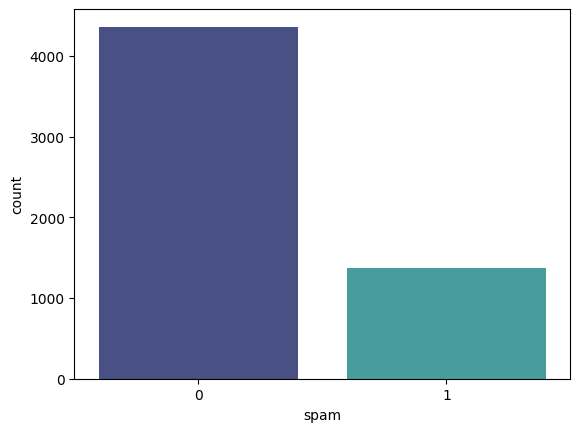

In [17]:
sns.countplot(x='spam', data=df, palette='mako')

In [21]:
(df.spam == 1).astype(int)

0       1
1       1
2       1
3       1
4       1
       ..
5723    0
5724    0
5725    0
5726    0
5727    0
Name: spam, Length: 5728, dtype: int64

In [23]:
?sns.heatmap

Signature:
sns.heatmap(
    data,
    *,
    vmin=None,
    vmax=None,
    cmap=None,
    center=None,
    robust=False,
    annot=None,
    fmt='.2g',
    annot_kws=None,
    linewidths=0,
    linecolor='white',
    cbar=True,
    cbar_kws=None,
    cbar_ax=None,
    square=False,
    xticklabels='auto',
    yticklabels='auto',
    mask=None,
    ax=None,
    **kwargs,
)
Docstring:
Plot rectangular data as a color-encoded matrix.

This is an Axes-level function and will draw the heatmap into the
currently-active Axes if none is provided to the ``ax`` argument.  Part of
this Axes space will be taken and used to plot a colormap, unless ``cbar``
is False or a separate Axes is provided to ``cbar_ax``.

Parameters
----------
data : rectangular dataset
    2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
    is provided, the index/column information will be used to label the
    columns and rows.
vmin, vmax : floats, optional
    Values to anchor the colormap, otherwise

In [30]:
test = df[['spam']] == 1
test.ndim

2

In [33]:
sns.heatmap(df['spam'], cmap='Blues')

IndexError: Inconsistent shape between the condition and the input (got (5728, 1) and (5728,))

<Axes: >

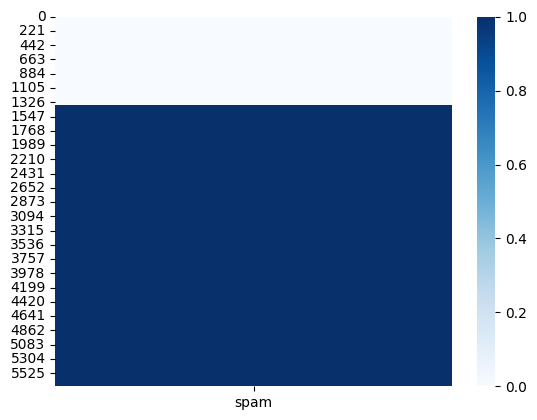

In [35]:
sns.heatmap(df[['spam']]==0, cmap='Blues')

In [37]:
spam = df[df.spam == 1]
spam.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [41]:
not_spam = df[df.spam == 0]
not_spam.head()

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0


In [45]:
print(f"Spam percentage = {round(len(spam)/len(df)*100,2)} %")
print(f"Ham percentage = {round(len(not_spam)/len(df)*100,2)} %")

Spam percentage = 23.88 %
Ham percentage = 76.12 %


/tmp/ipykernel_666257/3185207050.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='spam', data=df, label='Count Spam vs Spam', palette='inferno')


<Axes: xlabel='spam', ylabel='count'>

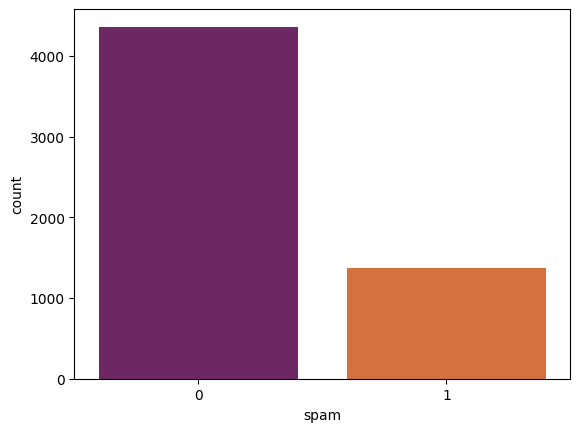

In [48]:
sns.countplot(x='spam', data=df, label='Count Spam vs Spam', palette='inferno')

# Step 3: Creating testing and training dataset/data cleaning

In [49]:
from sklearn.feature_extraction.text import CountVectorizer

In [50]:
sample_data = ['This is the rist document', 'This is the second document', 'This is the third document']

sample_vectorizer = CountVectorizer()

In [52]:
X = sample_vectorizer.fit_transform(sample_data)

In [53]:
dir(X)

['T',
 '__abs__',
 '__add__',
 '__array_priority__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__idiv__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__pow__',
 '__radd__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmatmul__',
 '__rmul__',
 '__round__',
 '__rsub__',
 '__rtruediv__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__weakref__',
 '_add_dense',
 '_add_sparse',
 '_allow_nd',
 '_arg_min_or_max',
 '_arg_min_or_max_axis',
 '_ascontainer',
 '_asfptype',
 '_asindices',
 '_binopt',
 '_broadcast_to',
 '_bsr_container',
 '_container',
 '_coo_container',
 '_csc_contai

In [55]:
print(X.toarray())

[[1 1 1 0 1 0 1]
 [1 1 0 1 1 0 1]
 [1 1 0 0 1 1 1]]


In [56]:
dir(sample_vectorizer)

['_CountVectorizer__metadata_request__fit',
 '_CountVectorizer__metadata_request__transform',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__sklearn_tags__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_request_for_signature',
 '_char_ngrams',
 '_char_wb_ngrams',
 '_check_feature_names',
 '_check_n_features',
 '_check_stop_words_consistency',
 '_check_vocabulary',
 '_count_vocab',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_limit_features',
 '_more_tags',
 '_parameter_constraints',
 '_r

In [59]:
print(sample_vectorizer.get_feature_names_out())

['document' 'is' 'rist' 'second' 'the' 'third' 'this']


In [60]:
print(X.toarray())

[[1 1 1 0 1 0 1]
 [1 1 0 1 1 0 1]
 [1 1 0 0 1 1 1]]


In [61]:
sample_data

['This is the rist document',
 'This is the second document',
 'This is the third document']

# Lets apply count vectorizer to our spam

In [62]:
from sklearn.feature_extraction.text import CountVectorizer

In [63]:
vectorizer = CountVectorizer()

In [64]:
spamham_countvectorizer = vectorizer.fit_transform(df.text)

In [65]:
vectorizer.get_feature_names_out()

array(['00', '000', '0000', ..., 'zzn', 'zzncacst', 'zzzz'],
      shape=(37303,), dtype=object)

In [69]:
print(spamham_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [70]:
spamham_countvectorizer.shape

(5728, 37303)

# Training the model

In [71]:
from sklearn.naive_bayes import MultinomialNB

In [72]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [82]:
label = df.spam.values

label[:5]

array([1, 1, 1, 1, 1])

In [83]:
type(spamham_countvectorizer)

scipy.sparse._csr.csr_matrix

In [84]:
spamham_countvectorizer.shape

(5728, 37303)

In [85]:
?MultinomialNB

Init signature:
MultinomialNB(
    *,
    alpha=1.0,
    force_alpha=True,
    fit_prior=True,
    class_prior=None,
)
Docstring:     
Naive Bayes classifier for multinomial models.

The multinomial Naive Bayes classifier is suitable for classification with
discrete features (e.g., word counts for text classification). The
multinomial distribution normally requires integer feature counts. However,
in practice, fractional counts such as tf-idf may also work.

Read more in the :ref:`User Guide <multinomial_naive_bayes>`.

Parameters
----------
alpha : float or array-like of shape (n_features,), default=1.0
    Additive (Laplace/Lidstone) smoothing parameter
    (set alpha=0 and force_alpha=True, for no smoothing).

force_alpha : bool, default=True
    If False and alpha is less than 1e-10, it will set alpha to
    1e-10. If True, alpha will remain unchanged. This may cause
    numerical errors if alpha is too close to 0.

    .. versionadded:: 1.2
    .. versionchanged:: 1.4
       The d

In [86]:
help(MultinomialNB)

Help on class MultinomialNB in module sklearn.naive_bayes:

class MultinomialNB(_BaseDiscreteNB)
 |  MultinomialNB(*, alpha=1.0, force_alpha=True, fit_prior=True, class_prior=None)
 |  
 |  Naive Bayes classifier for multinomial models.
 |  
 |  The multinomial Naive Bayes classifier is suitable for classification with
 |  discrete features (e.g., word counts for text classification). The
 |  multinomial distribution normally requires integer feature counts. However,
 |  in practice, fractional counts such as tf-idf may also work.
 |  
 |  Read more in the :ref:`User Guide <multinomial_naive_bayes>`.
 |  
 |  Parameters
 |  ----------
 |  alpha : float or array-like of shape (n_features,), default=1.0
 |      Additive (Laplace/Lidstone) smoothing parameter
 |      (set alpha=0 and force_alpha=True, for no smoothing).
 |  
 |  force_alpha : bool, default=True
 |      If False and alpha is less than 1e-10, it will set alpha to
 |      1e-10. If True, alpha will remain unchanged. This may

In [87]:
NB_classifier = MultinomialNB()
NB_classifier.fit(spamham_countvectorizer, label)

MultinomialNB()

In [88]:
testing_samples = ['Free money!!!', 'Hi Kim, please let me know if you need any further information']

In [89]:

testing_sample_countvectorizer = vectorizer.transform(testing_samples)

In [90]:
dir(testing_sample_countvectorizer)

['T',
 '__abs__',
 '__add__',
 '__array_priority__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__idiv__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__pow__',
 '__radd__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmatmul__',
 '__rmul__',
 '__round__',
 '__rsub__',
 '__rtruediv__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__weakref__',
 '_add_dense',
 '_add_sparse',
 '_allow_nd',
 '_arg_min_or_max',
 '_arg_min_or_max_axis',
 '_ascontainer',
 '_asfptype',
 '_asindices',
 '_binopt',
 '_broadcast_to',
 '_bsr_container',
 '_container',
 '_coo_container',
 '_csc_contai

In [92]:
print(testing_sample_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [93]:
testing_sample_countvectorizer.toarray().shape

(2, 37303)

In [ ]:
testing_samples = ['Free money!!!', 'Hi Kim, please let me know if you need any further information']

In [94]:
#The first one gets a 1 because our classifier has classify it as Spam ==1
#The secondo ne gets a 0, because the classifier has classify it as a non-spam
NB_classifier.predict(testing_sample_countvectorizer)

array([1, 0])

In [95]:
test2 = ['Hello, I am Ryan, I would like to book a hoetl in Bali by January 24th', 'money viagra!!!!']

In [96]:
from sklearn.feature_extraction.text import CountVectorizer

In [97]:
?CountVectorizer

Init signature:
CountVectorizer(
    *,
    input='content',
    encoding='utf-8',
    decode_error='strict',
    strip_accents=None,
    lowercase=True,
    preprocessor=None,
    tokenizer=None,
    stop_words=None,
    token_pattern='(?u)\\b\\w\\w+\\b',
    ngram_range=(1, 1),
    analyzer='word',
    max_df=1.0,
    min_df=1,
    max_features=None,
    vocabulary=None,
    binary=False,
    dtype=<class 'numpy.int64'>,
)
Docstring:     
Convert a collection of text documents to a matrix of token counts.

This implementation produces a sparse representation of the counts using
scipy.sparse.csr_matrix.

If you do not provide an a-priori dictionary and you do not use an analyzer
that does some kind of feature selection then the number of features will
be equal to the vocabulary size found by analyzing the data.

For an efficiency comparison of the different feature extractors, see
:ref:`sphx_glr_auto_examples_text_plot_hashing_vs_dict_vectorizer.py`.

Read more in the :ref:`User Guide

In [100]:
dir(cv)

['_CountVectorizer__metadata_request__fit',
 '_CountVectorizer__metadata_request__transform',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__sklearn_tags__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_request_for_signature',
 '_char_ngrams',
 '_char_wb_ngrams',
 '_check_feature_names',
 '_check_n_features',
 '_check_stop_words_consistency',
 '_check_vocabulary',
 '_count_vocab',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_limit_features',
 '_more_tags',
 '_parameter_constraints',
 '_r

In [102]:
df.head()


,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [103]:
df.columns

Index(['text', 'spam'], dtype='object')

In [105]:
cv = CountVectorizer()
text_vec = cv.fit_transform(df.text)

In [106]:
dir(text_vec)

['T',
 '__abs__',
 '__add__',
 '__array_priority__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__idiv__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__pow__',
 '__radd__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmatmul__',
 '__rmul__',
 '__round__',
 '__rsub__',
 '__rtruediv__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__weakref__',
 '_add_dense',
 '_add_sparse',
 '_allow_nd',
 '_arg_min_or_max',
 '_arg_min_or_max_axis',
 '_ascontainer',
 '_asfptype',
 '_asindices',
 '_binopt',
 '_broadcast_to',
 '_bsr_container',
 '_container',
 '_coo_container',
 '_csc_contai

In [109]:
cv.get_feature_names_out()

array(['00', '000', '0000', ..., 'zzn', 'zzncacst', 'zzzz'],
      shape=(37303,), dtype=object)

In [111]:
(text_vec.toarray())

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [4, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(5728, 37303))

In [112]:
text_vec.shape

(5728, 37303)

In [113]:
from sklearn.naive_bayes import MultinomialNB

In [114]:
?MultinomialNB

Init signature:
MultinomialNB(
    *,
    alpha=1.0,
    force_alpha=True,
    fit_prior=True,
    class_prior=None,
)
Docstring:     
Naive Bayes classifier for multinomial models.

The multinomial Naive Bayes classifier is suitable for classification with
discrete features (e.g., word counts for text classification). The
multinomial distribution normally requires integer feature counts. However,
in practice, fractional counts such as tf-idf may also work.

Read more in the :ref:`User Guide <multinomial_naive_bayes>`.

Parameters
----------
alpha : float or array-like of shape (n_features,), default=1.0
    Additive (Laplace/Lidstone) smoothing parameter
    (set alpha=0 and force_alpha=True, for no smoothing).

force_alpha : bool, default=True
    If False and alpha is less than 1e-10, it will set alpha to
    1e-10. If True, alpha will remain unchanged. This may cause
    numerical errors if alpha is too close to 0.

    .. versionadded:: 1.2
    .. versionchanged:: 1.4
       The d

In [115]:
df.columns

Index(['text', 'spam'], dtype='object')

In [118]:
target = df.spam
target.head()

0    1
1    1
2    1
3    1
4    1
Name: spam, dtype: int64

In [120]:
test2

['Hello, I am Ryan, I would like to book a hoetl in Bali by January 24th',
 'money viagra!!!!']

In [119]:
NB = MultinomialNB()
NB.fit(text_vec, target)

MultinomialNB()

In [123]:
test2_vec = cv.transform(test2)
test2_vec.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(2, 37303))

In [124]:
NB.predict(test2_vec)

array([0, 1])

# Step4: Divide the data into trainingj and testing prior to training

In [125]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [127]:
text_vec.toarray

<bound method _cs_matrix.toarray of <Compressed Sparse Row sparse matrix of dtype 'int64'
	with 708380 stored elements and shape (5728, 37303)>>

In [128]:
text_vec.shape

(5728, 37303)

In [129]:
target.shape

(5728,)

In [131]:
X = text_vec
y = target

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [136]:
X_train.toarray()[:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [2, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(5, 37303))

In [137]:
X_train2, X_test2, y_train, y_test = train_test_split(X.toarray(), y, test_size=0.2, random_state=5)

In [139]:
X_train2[:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [2, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(5, 37303))

In [140]:
type(X_train)

scipy.sparse._csr.csr_matrix

In [141]:
type(X_train2)

numpy.ndarray

In [145]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

0.9904013961605584
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       885
           1       0.96      1.00      0.98       261

    accuracy                           0.99      1146
   macro avg       0.98      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146



<Axes: >

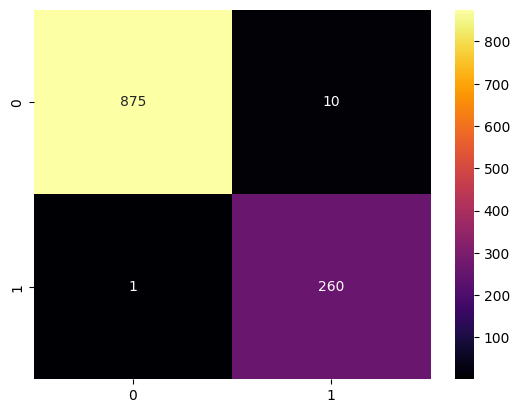

In [147]:
NB = MultinomialNB()
NB.fit(X_train, y_train)
y_test_predict = NB.predict(X_test)

print(accuracy_score(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))
cm = confusion_matrix(y_test, y_test_predict)
sns.heatmap(cm, annot=True, cmap='inferno', fmt='d')




0.9904013961605584
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       885
           1       0.96      1.00      0.98       261

    accuracy                           0.99      1146
   macro avg       0.98      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146



<Axes: >

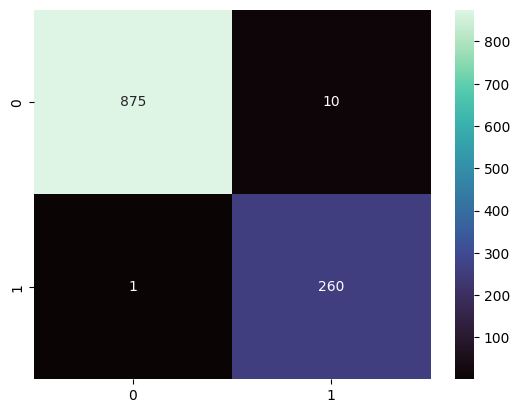

In [148]:
NB2 = MultinomialNB()
NB2.fit(X_train2, y_train)
y_test_predict2 = NB2.predict(X_test2)

print(accuracy_score(y_test, y_test_predict2))
print(classification_report(y_test, y_test_predict2))
cm2= confusion_matrix(y_test, y_test_predict2)
sns.heatmap(cm2, annot=True, fmt='d', cmap='mako')

In [149]:
X_train.shape

(4582, 37303)

# Step 5: Evaluating the model

In [150]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       885
           1       0.96      1.00      0.98       261

    accuracy                           0.99      1146
   macro avg       0.98      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146

